<a href="https://colab.research.google.com/github/StalkYy-06/5CS037-2024/blob/main/swarnim_rai_2414970_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [86]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/Global Health Statistics.csv')

## Exploratory Data Analysis Statistical Interpretation and Visualizations


In [ ]:
#inspecting first few rows of the dataset
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [ ]:
# checking basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [ ]:
#checking for null values
df.isnull().sum()

,0
Country,0
Year,0
Disease Name,0
Disease Category,0
Prevalence Rate (%),0
Incidence Rate (%),0
Mortality Rate (%),0
Age Group,0
Gender,0
Population Affected,0


In [ ]:
df.describe()

,Year,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%),Recovery Category
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.047992,7.555005,5.049919,500735.427363,74.987835,2.747929,5.245931,25010.313665,74.496934,2499.144809,5.002593,50311.099835,0.650069,54.985212,0.591594
std,7.217287,5.740189,4.298947,2.859427,288660.116648,14.436345,1.299067,2.742865,14402.279227,14.155168,1443.923798,2.888298,28726.959359,0.144472,20.214042,0.491539
min,2000.000000,0.100000,0.100000,0.100000,1000.000000,50.000000,0.500000,0.500000,100.000000,50.000000,1.000000,0.000000,500.000000,0.400000,20.000000,0.000000
25%,2006.000000,5.090000,3.840000,2.580000,250491.250000,62.470000,1.620000,2.870000,12538.000000,62.220000,1245.000000,2.500000,25457.000000,0.530000,37.470000,0.000000
50%,2012.000000,10.040000,7.550000,5.050000,501041.000000,75.000000,2.750000,5.240000,24980.000000,74.470000,2499.000000,5.000000,50372.000000,0.650000,54.980000,1.000000
75%,2018.000000,15.010000,11.280000,7.530000,750782.000000,87.490000,3.870000,7.620000,37493.000000,86.780000,3750.000000,7.510000,75195.000000,0.780000,72.510000,1.000000
max,2024.000000,20.000000,15.000000,10.000000,1000000.000000,100.000000,5.000000,10.000000,50000.000000,99.000000,5000.000000,10.000000,100000.000000,0.900000,90.000000,1.000000


In [100]:
columns = df.columns

In [ ]:
# checking for duplicate values
print(f"number of duplicates : {df.duplicated().sum()}")

number of duplicates : 0


Recovery Category
1    591594
0    408406
Name: count, dtype: int64


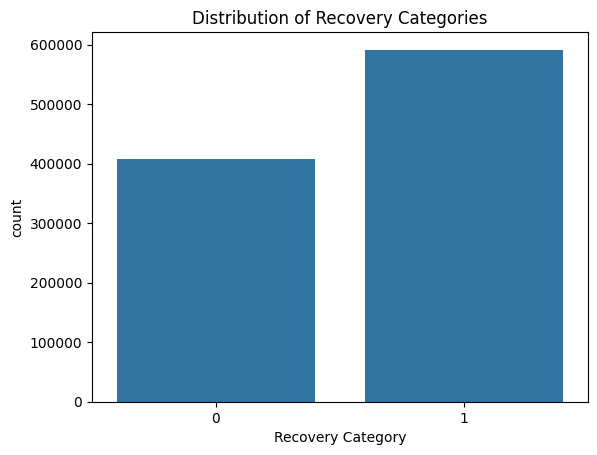

In [ ]:
# Definining the target variable
df['Recovery Category'] = np.where(df['Recovery Rate (%)'] >= 70, 1, 0) # 1 = high recovery & 0 = low recovery

# Checking value counts of the target variable
print(df['Recovery Category'].value_counts())

# plotting the value count of the target variable
sns.countplot(data=df, x='Recovery Category')
plt.title('Distribution of Recovery Categories')
plt.show()

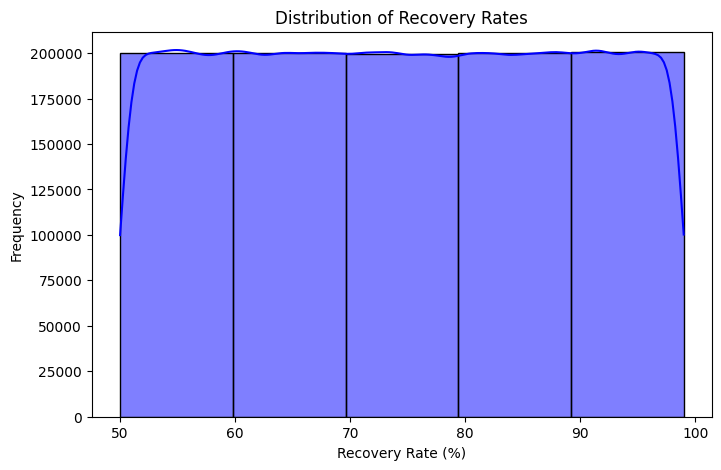

In [ ]:
# Histogram of Recovery Rates
plt.figure(figsize=(8, 5))
sns.histplot(df["Recovery Rate (%)"], bins=5, kde=True, color="blue")
plt.title("Distribution of Recovery Rates")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Frequency")
plt.show()

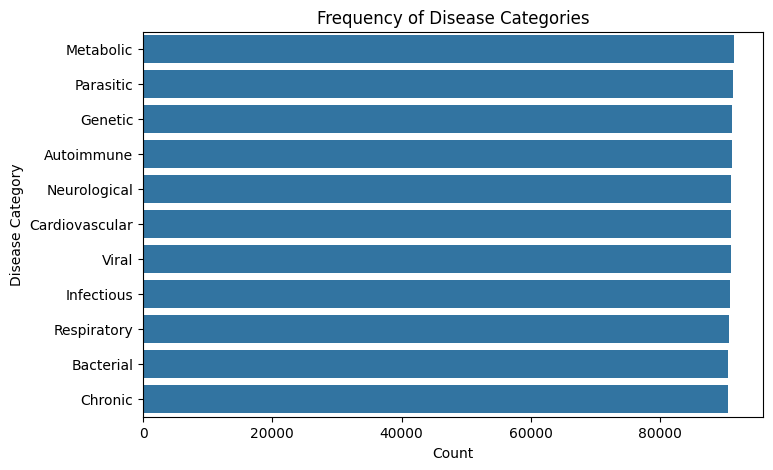

In [ ]:
#Bar plot of Disease Category Frequency
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Disease Category"], order=df["Disease Category"].value_counts().index,)
plt.title("Frequency of Disease Categories")
plt.xlabel("Count")
plt.ylabel("Disease Category")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


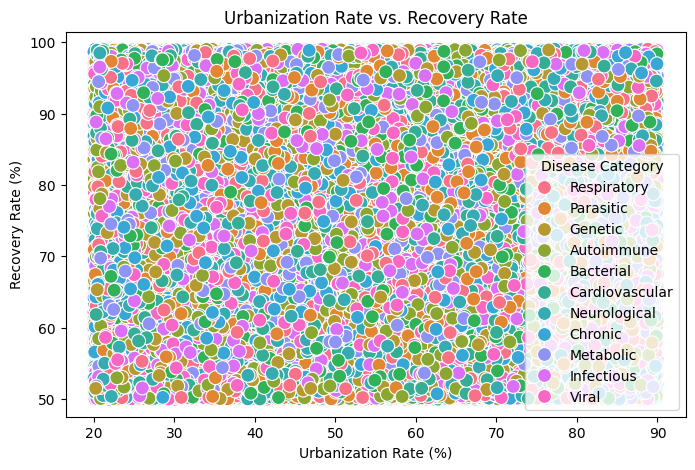

In [ ]:
# Urbanization vs. Recovery Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Urbanization Rate (%)"], y=df["Recovery Rate (%)"], hue=df["Disease Category"], s=100)
plt.title("Urbanization Rate vs. Recovery Rate")
plt.xlabel("Urbanization Rate (%)")
plt.ylabel("Recovery Rate (%)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


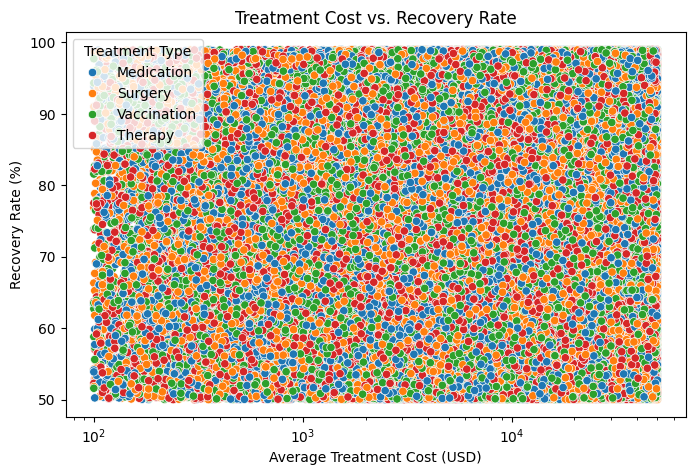

In [ ]:
# Treatment Cost vs. Recovery Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Average Treatment Cost (USD)"], y=df["Recovery Rate (%)"], hue=df["Treatment Type"],)
plt.xscale("log")  # Log scale for better visualization
plt.title("Treatment Cost vs. Recovery Rate")
plt.xlabel("Average Treatment Cost (USD)")
plt.ylabel("Recovery Rate (%)")
plt.show()

## Building logistic regression from the scratch

In [ ]:
# Selecting numerical columns only
numerical_columns = [
    'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
    'Population Affected', 'Healthcare Access (%)', 'Doctors per 1000',
    'Hospital Beds per 1000', 'Average Treatment Cost (USD)',
    'DALYs', 'Improvement in 5 Years (%)', 'Per Capita Income (USD)',
    'Education Index', 'Urbanization Rate (%)'
]
# splitting the dataset into feature and target variable
X = df[numerical_columns].values
y = df['Recovery Category'].values

#normalizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Sigmoid function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

#cost function and gradiant computation
def compute_cost_and_gradient(X, y, weights, bias):
  m = X.shape[0]
  z = np.dot(X, weights) + bias
  predictions = sigmoid(z)

  # Avoid log(0) errors
  predictions = np.clip(predictions, 1e-9, 1 - 1e-9)

  # Cost: Binary cross-entropy
  cost = -np.mean(y * np.log(predictions) + (1-y) * np.log(1 - predictions))

  # Gradients
  dw = np.dot(X.T, (predictions - y)) / m
  db = np.mean(predictions - y)

  return cost, dw, db

# Gradient descent optimization
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
  for i in range(num_iterations):
    cost, dw, db = compute_cost_and_gradient(X, y, weights, bias)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Print cost every 100 iterations for debugging
    if i % 100 == 0:
      print(f"Iteration {i}: Cost {cost}")
  return weights, bias

# Predict labels using the trained model
def predict(X, weights, bias):
  z = np.dot(X, weights) + bias
  probabilities = sigmoid(z)
  return (probabilities >= 0.5).astype(int)

In [ ]:
# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

# Checking the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10000, 13)
X_test shape: (990000, 13)
y_train shape: (10000,)
y_test shape: (990000,)


In [ ]:
# Intialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Training the Logistic Regression model
learning_rate = 0.01
num_iterations = 1000

#Train using gradient descent
trained_weights, trained_bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)

Iteration 0: Cost 0.6931471805599453
Iteration 100: Cost 0.6857598875743741
Iteration 200: Cost 0.6812781380031219
Iteration 300: Cost 0.67855275233556
Iteration 400: Cost 0.6768908579703783
Iteration 500: Cost 0.6758747006315101
Iteration 600: Cost 0.6752518242990584
Iteration 700: Cost 0.6748691787152791
Iteration 800: Cost 0.6746336664512551
Iteration 900: Cost 0.6744884785604764


In [ ]:
#Predict on training and test sets
y_train_pred = predict(X_train,trained_weights, trained_bias)
y_test_pred = predict(X_test,trained_weights, trained_bias)

In [ ]:
#evaluating the model
def evaluate_model(y_true, y_pred, model_name):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  print(f"\n{model_name} Evaluation:")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 Score: {f1:.2f}\n")

# Evaluate the scratch Logistic Regression model
print("Logistic Regression from Scratch:")
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Logistic Regression from Scratch:

Train Set Evaluation:
Accuracy: 0.60
Precision: 0.60
Recall: 1.00
F1 Score: 0.75


Test Set Evaluation:
Accuracy: 0.59
Precision: 0.59
Recall: 1.00
F1 Score: 0.74



## Build Two Models for Regression

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

#### Model 1:

In [93]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

# Predcitions
y_pred_dt_test = dt_model.predict(X_test)
y_pred_dt_train = dt_model.predict(X_train)

print(evaluate_model(y_test, y_pred_dt_test,"Decision Tree(Test)"))
print(evaluate_model(y_train, y_pred_dt_train,"Decision Tree(Train)"))


Decision Tree(Test) Evaluation:
Accuracy: 0.59
Precision: 0.59
Recall: 0.98
F1 Score: 0.74
None

Decision Tree(Train) Evaluation:
Accuracy: 0.60
Precision: 0.60
Recall: 0.99
F1 Score: 0.75
None


#### Model 2:

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
evaluate_model(y_train, y_train_pred_rf, "Random Forest (Train)")
evaluate_model(y_test, y_test_pred_rf, "Random Forest (Test)")


Random Forest (Train) Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Random Forest (Test) Evaluation:
Accuracy: 0.57
Precision: 0.59
Recall: 0.89
F1 Score: 0.71


## Hyperparameter optimiation with cross validation

In [ ]:
# importing necessary modules
from sklearn.model_selection import GridSearchCV, cross_val_score

#### Model 1:

In [ ]:
# define hyperparameter grid for Decision tree

dt_params ={
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Perform GridSearch with Cross Validation (5-Fold)
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Best parameters and score
print(f"Best parameters for Logistic Regression: {dt_grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {dt_grid.best_score_:.2f}")

Best parameters for Logistic Regression: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.59


In [ ]:
# Train the best model
best_dt_reg = dt_grid.best_estimator_

# Evaluate on test set
y_test_pred_dt = best_dt_reg.predict(X_test)
evaluate_model(y_test, y_test_pred_dt, "Optimized Decision Tree(Test)")


Optimized Decision Tree(Test) Evaluation:
Accuracy: 0.59
Precision: 0.59
Recall: 0.99
F1 Score: 0.74


#### Model 2:

In [ ]:
# Define hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

In [ ]:
# Perform GridSearch with Cross Validation (5-Fold)
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Best parameters and score
print(f"Best parameters for Random Forest: {rf_grid.best_params_}")
print(f"Best Cross-Validation Accuracy: {rf_grid.best_score_:.2f}")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.60


In [ ]:
# Train the best model
best_rf = rf_grid.best_estimator_

# Evaluate on test set
y_test_pred_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_test_pred_rf, "Optimized Random Forest (Test)")


Optimized Random Forest (Test) Evaluation:
Accuracy: 0.59
Precision: 0.59
Recall: 1.00
F1 Score: 0.74


#### Cross validation score:

In [95]:
# Perform 5-fold cross-validation and print average accuracy for both models
dt_cv_score = cross_val_score(best_dt_reg, X, y, cv=5, scoring='accuracy').mean()
rf_cv_score = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy').mean()

print(f"\nCross-Validation Accuracy - Decision Tree: {dt_cv_score:.2f}")
print(f"Cross-Validation Accuracy - Random Forest: {rf_cv_score:.2f}")


Cross-Validation Accuracy - Decision Tree: 0.59
Cross-Validation Accuracy - Random Forest: 0.59


## Feature Selection

In [73]:
#importing necessary modules
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

#### Model 1(Decision Tree):

In [96]:
# Feature Selection for Decision Tree

# Selecting the best 5 features
select_k_best_dt = SelectKBest(f_classif, k=5)
X_train_selected_dt = select_k_best_dt.fit_transform(X_train, y_train)
X_test_selected_dt = select_k_best_dt.transform(X_test)

# Printing the selected features indices and the feature scores
print("Selected Features for Decision Tree:")
selected_feature_dt = select_k_best_dt.get_support(indices=True)
print("Feature indices:", selected_feature_dt)
print("Feature scores:", select_k_best_dt.scores_)

# Training the Decision Tree model on the selected Features
dt_selected = DecisionTreeClassifier()
dt_selected.fit(X_train_selected_dt, y_train)

# Evaluating the model on the test set
y_pred_selected_dt = dt_selected.predict(X_test_selected_dt)
accuray_selected_dt = accuracy_score(y_test, y_pred_selected_dt)
print(f"Decision Tree Accuracy with Selected Features Accuracy: {accuray_selected_dt:.4f}")

Selected Features for Decision Tree:
Feature indices: [ 4  7  8  9 12]
Feature scores: [0.10983803 0.26579797 0.66497862 0.50570238 0.88775163 0.06262753
 0.02775859 2.26386306 1.10904561 1.02651586 0.48924347 0.37384454
 2.35841144]
Decision Tree Accuracy with Selected Features Accuracy: 0.5156


#### Model 2(Random Forest):

In [97]:
# Feature Selection for Random Forest

# Fit a Random Forest Model to evaluate feature importance
rf_model.fit(X_train, y_train)

# Select the top 5 most important features
select_from_model_rf = SelectFromModel(rf_model, max_features=5, prefit=True)
X_train_selected_rf = select_from_model_rf.transform(X_train)
X_test_selected_rf = select_from_model_rf.transform(X_test)

# Printing the selected features indices
print("Selected Features for Random Forest:")
selected_feature_rf = select_from_model_rf.get_support(indices=True)
print("Feature indices:", selected_feature_rf)

# Train a Random Forest model on the selected Features
rf_selected = RandomForestClassifier(n_estimators=100)
rf_selected.fit(X_train_selected_rf, y_train)

# Evaluate the model on the test set
y_pred_selected_rf = rf_selected.predict(X_test_selected_rf)
accuracy_selected_rf = accuracy_score(y_test, y_pred_selected_rf)
print(f"Random Forest Accuracy with Selected Features: {accuracy_selected_rf:.4f}")

Selected Features for Random Forest:
Feature indices: [ 3  7  8 10 12]
Random Forest Accuracy with Selected Features: 0.5526


## Final Model:

In [103]:
# Final Model For Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Final Model For Random Forest

# Using best hyperparameters from GridSearchCV (example values)
best_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

# Train Random Forest with Best Hyperparameters
rf_final = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Get selected feature indices
selected_feature_indices = select_from_model_rf.get_support(indices=True)

# Use NumPy indexing instead of .iloc[]
X_train_selected_rf = X_train[:, selected_feature_indices]
X_test_selected_rf = X_test[:, selected_feature_indices]

# Fit the model
rf_final.fit(X_train_selected_rf, y_train)

# Make predictions on the test data
y_pred_rf_final = rf_final.predict(X_test_selected_rf)

# Calculate metrics
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_final)
precision_rf_final = precision_score(y_test, y_pred_rf_final, average='weighted')
recall_rf_final = recall_score(y_test, y_pred_rf_final, average='weighted')
f1_rf_final = f1_score(y_test, y_pred_rf_final, average='weighted')

# Compare with previous performance
print(f"Random Forest Accuracy with Selected Features: {accuracy_selected_rf:.4f}")
print(f"Final Random Forest Accuracy: {accuracy_rf_final:.4f}")

# Print additional metrics
print(f"Final Random Forest Precision: {precision_rf_final:.4f}")
print(f"Final Random Forest Recall: {recall_rf_final:.4f}")
print(f"Final Random Forest F1 Score: {f1_rf_final:.4f}")

# Which model did better?
if accuracy_rf_final > accuracy_selected_rf:
    print("Final Random Forest performed better after using the best hyperparameters and selected Features.")
else:
    print("Model performance did not improve after using the best hyperparameters and selected Features.")

Random Forest Accuracy with Selected Features: 0.5526
Final Random Forest Accuracy: 0.5897
Final Random Forest Precision: 0.5168
Final Random Forest Recall: 0.5897
Final Random Forest F1 Score: 0.4461
Final Random Forest performed better after using the best hyperparameters and selected Features.


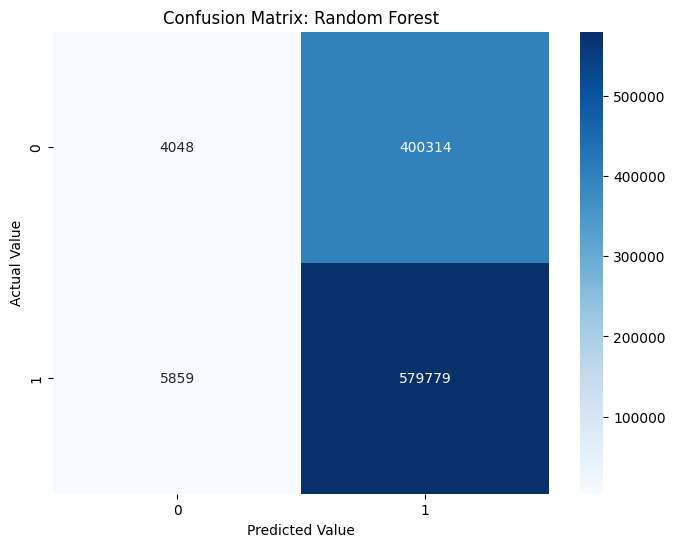

In [104]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred_rf_final)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_final.classes_, yticklabels=rf_final.classes_)
plt.title("Confusion Matrix: Random Forest")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()